In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("lab_courses_2015.csv", sep=';')
data.head()

,component,action,target,contextid,contextlevel,contextinstanceid
0,5,10,5,105728,50,1089
1,17,10,6,105844,70,67635
2,5,10,5,105728,50,1089
3,9,10,12,105734,70,67525
4,5,10,5,106176,50,1094


In [2]:
X = data[['component','action','target','contextid','contextlevel','contextinstanceid']]

In [4]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

In [5]:
db_index = davies_bouldin_score(X, labels)
print(db_index)

0.45428157718312895


Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

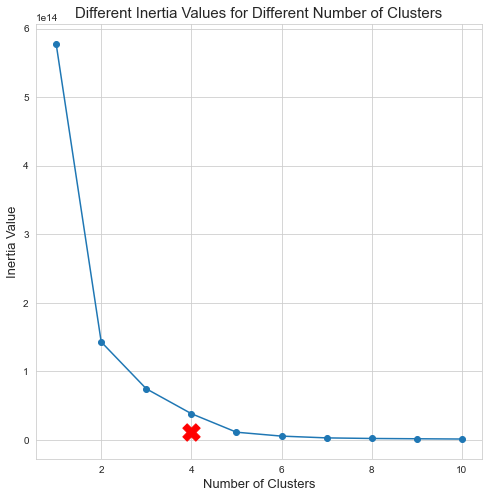

In [6]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++")
    kmeans_model.fit(X)
    inertia_list.append(kmeans_model.inertia_)
    
# plot the inertia curve
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.scatter(4, inertia_list[4], marker="X", s=300, c="r")
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=15)

In [7]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=4, random_state=20)
labels = kmeans.fit_predict(X)

In [8]:
db_index = davies_bouldin_score(X, labels)
print(db_index)

0.35925975731545445


In [9]:
from sklearn.metrics import pairwise_distances
from sklearn import metrics

In [10]:
kmeans = KMeans(n_clusters=4, random_state=1).fit(X)
labels = kmeans.labels_
 
print(metrics.calinski_harabasz_score(X, labels))

1018910.6567232416


In [11]:
from sklearn.metrics import silhouette_score
# Instantiate the KMeans models
#
km = KMeans(n_clusters=4, random_state=42)
#
# Fit the KMeans model
#
km.fit_predict(X)
#
# Calculate Silhoutte Score
#
score = silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.767
